In [1]:
# Import all libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import SGD,RMSprop,Adam
from keras.utils import np_utils
from keras.models import model_from_json
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Disable warning message of tensorflow
import cv2
from numpy import *
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from skimage.measure import compare_ssim
from skimage.util.shape import view_as_windows
import math

Using TensorFlow backend.


396900


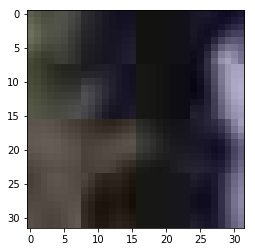

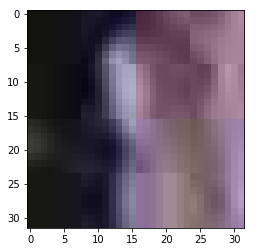

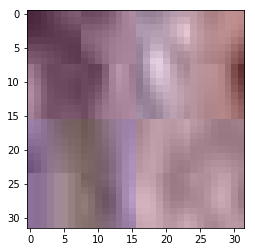

In [2]:
# Load X data
path1 = './Input/'
X_data = os.listdir(path1)
X_data = sorted(X_data)

X = []
window_shape = (32, 32, 3)
for img in X_data:
    im = cv2.cvtColor(cv2.imread(path1 + img,1), cv2.COLOR_BGR2RGB)
    patches = view_as_windows(im, window_shape, step=16)
    patches = patches.reshape(patches.shape[0]*patches.shape[1],32,32,3)
    for i in range(0,len(patches)):
        X.append(patches[i])
        
X = np.array(X)
print(len(X))
plt.imshow(X[1].reshape(32,32,3))
plt.figure()
plt.imshow(X[2].reshape(32,32,3))
plt.figure()
plt.imshow(X[3].reshape(32,32,3))

396900


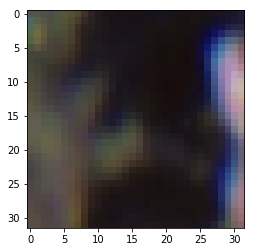

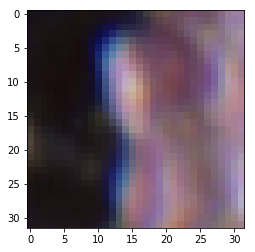

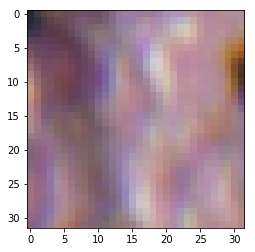

In [3]:
# Load Y data
path2 = './Label/'
Y_data = os.listdir(path2)
Y_data = sorted(Y_data)

Y = []
window_shape = (32, 32, 3)
for img2 in Y_data:
    im2 = cv2.cvtColor(cv2.imread(path2 + img2,1), cv2.COLOR_BGR2RGB)
    patches = view_as_windows(im2, window_shape, step=16)
    patches = patches.reshape(patches.shape[0]*patches.shape[1],32,32,3)
    for i in range(0,len(patches)):
        Y.append(patches[i])

Y = np.array(Y)
print(len(Y))
plt.imshow(Y[1].reshape(32,32,3))
plt.figure()
plt.imshow(Y[2].reshape(32,32,3))
plt.figure()
plt.imshow(Y[3].reshape(32,32,3))

In [4]:
# Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 4)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
Y_train = Y_train.reshape(Y_train.shape[0], 32, 32, 3)
Y_test = Y_test.reshape(Y_test.shape[0], 32, 32, 3)

X_train = X_train.astype('uint8') 
X_test = X_test.astype('uint8')
Y_train = Y_train.astype('uint8') 
Y_test = Y_test.astype('uint8')

# Normalization of data 
# Data pixels are between 0 and 1
# X_train /= 255
# X_test /= 255
# Y_train /= 255
# Y_test /= 255

print(np.shape(X_train),np.shape(X_test),np.shape(Y_train),np.shape(Y_test))

(317520, 32, 32, 3) (79380, 32, 32, 3) (317520, 32, 32, 3) (79380, 32, 32, 3)


In [5]:
model = Sequential()
model.add(Conv2D(128, (9, 9), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (1, 1), activation='relu', padding='same'))
model.add(Conv2D(3, (5, 5), activation='linear', padding='same'))

opt = Adam(lr = 0.01)

model.compile(loss='mean_absolute_error', optimizer = opt) 
model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       31232     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 3)         4803      
Total params: 44,291
Trainable params: 44,291
Non-trainable params: 0
_________________________________________________________________


In [6]:
reduce_lr = ReduceLROnPlateau(monitor='loss', patience=10, factor=0.1, min_lr=0.00001)
filepath="weights.best.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks = [EarlyStopping(monitor='loss', patience=20, verbose=1), reduce_lr, checkpoint]

# callbacks = [EarlyStopping(monitor='loss', patience=20, verbose=1), reduce_lr]

results = model.fit(X_train, Y_train, batch_size=512, epochs=250, validation_split = 0.2, shuffle = True, callbacks = callbacks)


Train on 254016 samples, validate on 63504 samples
Epoch 1/250
254016/254016 [==============================] - 21s - loss: 16.3459 - val_loss: 9.2050
Epoch 2/250
254016/254016 [==============================] - 18s - loss: 9.0843 - val_loss: 6.9215
Epoch 3/250
254016/254016 [==============================] - 17s - loss: 7.3616 - val_loss: 7.5178
Epoch 4/250
254016/254016 [==============================] - 18s - loss: 7.4257 - val_loss: 7.1817
Epoch 5/250
254016/254016 [==============================] - 17s - loss: 7.1612 - val_loss: 6.9819
Epoch 6/250
254016/254016 [==============================] - 17s - loss: 7.0551 - val_loss: 7.2094
Epoch 7/250
254016/254016 [==============================] - 18s - loss: 6.8845 - val_loss: 7.0475
Epoch 8/250
254016/254016 [==============================] - 17s - loss: 6.9498 - val_loss: 7.0711
Epoch 9/250
254016/254016 [==============================] - 17s - loss: 6.8862 - val_loss: 7.9231
Epoch 10/250
254016/254016 [=============================

254016/254016 [==============================] - 19s - loss: 6.0480 - val_loss: 6.1034
Epoch 37/250
254016/254016 [==============================] - 18s - loss: 6.0387 - val_loss: 6.0780
Epoch 38/250
254016/254016 [==============================] - 18s - loss: 6.0348 - val_loss: 6.0667
Epoch 39/250
254016/254016 [==============================] - 18s - loss: 6.0254 - val_loss: 6.0567
Epoch 40/250
254016/254016 [==============================] - 19s - loss: 6.0127 - val_loss: 6.1409
Epoch 41/250
254016/254016 [==============================] - 18s - loss: 6.0102 - val_loss: 6.1061
Epoch 42/250
254016/254016 [==============================] - 19s - loss: 5.9992 - val_loss: 6.0780
Epoch 43/250
254016/254016 [==============================] - 19s - loss: 5.9923 - val_loss: 6.0526
Epoch 44/250
254016/254016 [==============================] - 18s - loss: 5.9854 - val_loss: 6.0566
Epoch 45/250
254016/254016 [==============================] - 18s - loss: 5.9788 - val_loss: 6.0311
Epoch 46/250


254016/254016 [==============================] - 18s - loss: 5.8957 - val_loss: 5.9635
Epoch 70/250
254016/254016 [==============================] - 18s - loss: 5.8921 - val_loss: 5.9257
Epoch 71/250
254016/254016 [==============================] - 18s - loss: 5.8866 - val_loss: 5.9570
Epoch 72/250
254016/254016 [==============================] - 18s - loss: 5.8898 - val_loss: 5.9538
Epoch 73/250
254016/254016 [==============================] - 18s - loss: 5.8839 - val_loss: 5.9626
Epoch 74/250
254016/254016 [==============================] - 17s - loss: 5.8843 - val_loss: 5.9234
Epoch 75/250
254016/254016 [==============================] - 18s - loss: 5.8824 - val_loss: 6.0818
Epoch 76/250
254016/254016 [==============================] - 18s - loss: 5.8780 - val_loss: 5.9375
Epoch 77/250
254016/254016 [==============================] - 18s - loss: 5.8777 - val_loss: 5.9555
Epoch 78/250
254016/254016 [==============================] - 18s - loss: 5.8787 - val_loss: 5.9215
Epoch 79/250


254016/254016 [==============================] - 18s - loss: 5.8508 - val_loss: 5.9177
Epoch 105/250
254016/254016 [==============================] - 17s - loss: 5.8522 - val_loss: 5.8819
Epoch 106/250
254016/254016 [==============================] - 17s - loss: 5.8482 - val_loss: 5.9682
Epoch 107/250
254016/254016 [==============================] - 17s - loss: 5.8493 - val_loss: 5.9222
Epoch 108/250
254016/254016 [==============================] - 18s - loss: 5.8479 - val_loss: 5.9549
Epoch 109/250
254016/254016 [==============================] - 18s - loss: 5.8473 - val_loss: 5.9895
Epoch 110/250
254016/254016 [==============================] - 18s - loss: 5.8507 - val_loss: 5.9024
Epoch 111/250
254016/254016 [==============================] - 18s - loss: 5.8472 - val_loss: 5.8918
Epoch 112/250
254016/254016 [==============================] - 18s - loss: 5.8443 - val_loss: 5.8974
Epoch 113/250
254016/254016 [==============================] - 18s - loss: 5.8493 - val_loss: 5.9302
Epoc

254016/254016 [==============================] - 18s - loss: 5.8388 - val_loss: 5.8853
Epoch 141/250
254016/254016 [==============================] - 18s - loss: 5.8350 - val_loss: 5.9813
Epoch 142/250
254016/254016 [==============================] - 18s - loss: 5.8355 - val_loss: 5.8775
Epoch 143/250
254016/254016 [==============================] - 17s - loss: 5.8344 - val_loss: 5.9165
Epoch 144/250
254016/254016 [==============================] - 18s - loss: 5.8337 - val_loss: 5.8943
Epoch 145/250
254016/254016 [==============================] - 17s - loss: 5.8360 - val_loss: 5.9124
Epoch 146/250
254016/254016 [==============================] - 17s - loss: 5.8363 - val_loss: 5.8940
Epoch 147/250
254016/254016 [==============================] - 17s - loss: 5.8307 - val_loss: 5.9091
Epoch 148/250
254016/254016 [==============================] - 18s - loss: 5.8357 - val_loss: 5.9088
Epoch 149/250
254016/254016 [==============================] - 18s - loss: 5.8321 - val_loss: 5.8701
Epoc

254016/254016 [==============================] - 18s - loss: 5.8241 - val_loss: 5.9356
Epoch 179/250
254016/254016 [==============================] - 18s - loss: 5.8261 - val_loss: 5.9465
Epoch 180/250
254016/254016 [==============================] - 18s - loss: 5.8305 - val_loss: 5.8687
Epoch 181/250
254016/254016 [==============================] - 17s - loss: 5.8230 - val_loss: 5.8721
Epoch 182/250
254016/254016 [==============================] - 17s - loss: 5.8270 - val_loss: 5.9294
Epoch 183/250
254016/254016 [==============================] - 18s - loss: 5.8218 - val_loss: 5.9564
Epoch 184/250
254016/254016 [==============================] - 18s - loss: 5.8274 - val_loss: 5.9173
Epoch 185/250
254016/254016 [==============================] - 18s - loss: 5.8275 - val_loss: 5.8665
Epoch 186/250
254016/254016 [==============================] - 18s - loss: 5.8214 - val_loss: 5.8766
Epoch 187/250
254016/254016 [==============================] - 17s - loss: 5.8294 - val_loss: 5.9103
Epoc

254016/254016 [==============================] - 17s - loss: 5.8176 - val_loss: 5.8729
Epoch 217/250
254016/254016 [==============================] - 18s - loss: 5.8200 - val_loss: 5.8906
Epoch 218/250
254016/254016 [==============================] - 18s - loss: 5.8213 - val_loss: 5.8864
Epoch 219/250
254016/254016 [==============================] - 18s - loss: 5.8204 - val_loss: 5.8489
Epoch 220/250
254016/254016 [==============================] - 18s - loss: 5.8178 - val_loss: 5.8593
Epoch 221/250
254016/254016 [==============================] - 17s - loss: 5.8191 - val_loss: 5.8672
Epoch 222/250
254016/254016 [==============================] - 17s - loss: 5.8232 - val_loss: 5.8601
Epoch 223/250
254016/254016 [==============================] - 18s - loss: 5.7864 - val_loss: 5.8292
Epoch 224/250
254016/254016 [==============================] - 19s - loss: 5.7859 - val_loss: 5.8286
Epoch 225/250
254016/254016 [==============================] - 17s - loss: 5.7863 - val_loss: 5.8294
Epoc

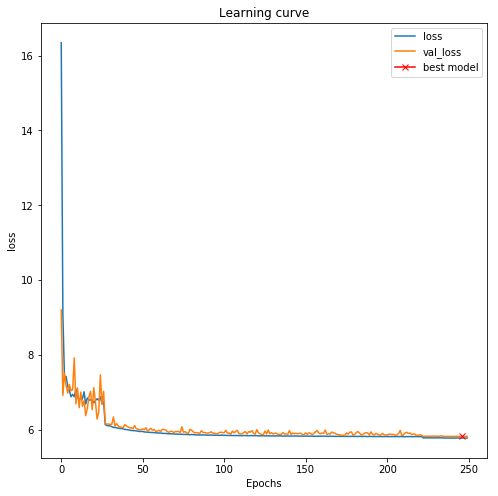

In [7]:
train_loss = results.history['loss']
val_loss = results.history['val_loss'] 
# train_acc = results.history['acc']
# val_acc = results.history['val_acc']

plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()

In [8]:
# score = model.evaluate(X_test, Y_test, verbose=0) # accuracy check
# print(score.shape)
# print('Test loss:', score[0]) # Prints test loss

In [9]:
# Save model and weights
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to H5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [10]:
# Load model and weights
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load weights into new model
loaded_model.load_weights("weights.best.h5")
# loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


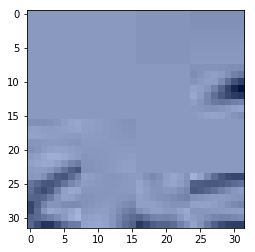

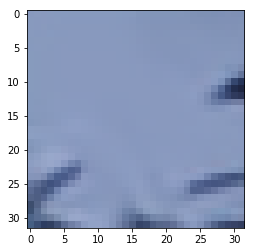

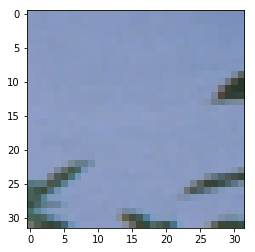

In [11]:
k = 1
test_img = X_test[k].reshape(1, 32, 32, 3)
pred_img = loaded_model.predict(test_img)
pred_img = pred_img.reshape(32,32,3)
pred_img = pred_img.astype('uint8') 

plt.imshow(X_test[k].reshape(32,32,3))
plt.figure()
plt.imshow(pred_img)
plt.figure()
plt.imshow(Y_test[k].reshape(32,32,3))

Y_test_img = Y_test[k].reshape(32,32,3).astype('uint8')
X_test_img = X_test[k].reshape(32,32,3).astype('uint8')

In [12]:
# Compute MSE
print('MSE (Y, X): ', mean_squared_error(Y_test_img, X_test_img))
print('MSE (Y , Predict): ', mean_squared_error(Y_test_img, pred_img))

# Compute MAE
print('\nMAE (Y, X): ', mean_absolute_error(Y_test_img, X_test_img))
print('MAE (Y , Predict): ', mean_absolute_error(Y_test_img, pred_img))

# Compute SSIM
(score1, diff1) = compare_ssim(Y_test_img, X_test_img, full=True)
print('\nSSIM (Y, X): ', score1)
(score2, diff2) = compare_ssim(Y_test_img, pred_img, full=True)
print('SSIM (Y, Predict): ', score2)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [13]:
# Compute PSNR
def psnr(img1, img2):
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

psnr_X_test = psnr(Y_test_img, X_test_img)
print('\nPSNR (Y, X): ', psnr_X_test)
psnr_predict = psnr(Y_test_img, pred_img)
print('PSNR (Y, X): ', psnr_predict)


PSNR (Y, X):  33.69216640092657
PSNR (Y, X):  34.37172762908199


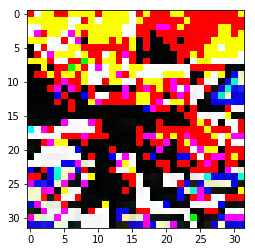

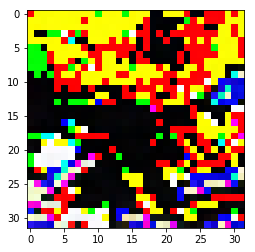

In [14]:
err_X_img = Y_test_img - X_test_img
plt.imshow(err_X_img)

err_pred_img = Y_test_img - pred_img
plt.figure()
plt.imshow(err_pred_img)